In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(rc={'figure.figsize':(8,7)})


In [2]:
df = pd.read_csv("C:/Users/sstev/OneDrive/Documents/Datasets/Ecommerce_Data-1.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 800x700 with 0 Axes>

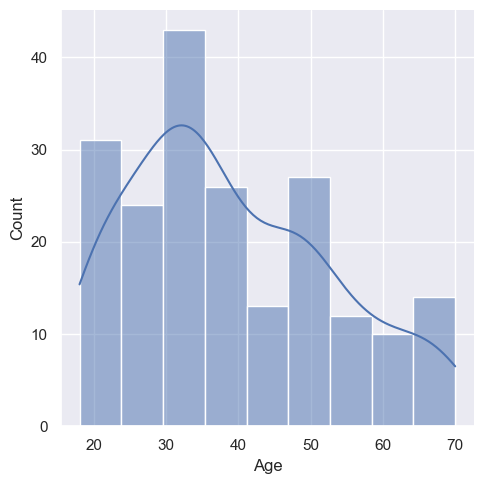

<Figure size 800x700 with 0 Axes>

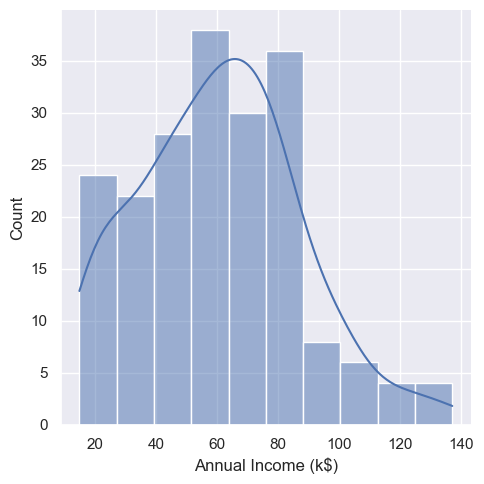

<Figure size 800x700 with 0 Axes>

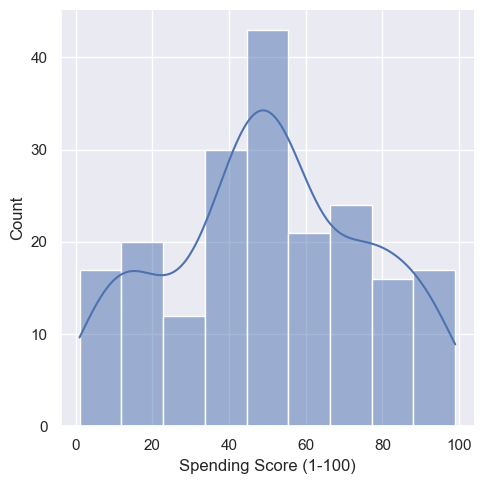

In [5]:
df_col = []

for x in df.columns[2:]:
    df_col.append(x)


for x in df_col:
    plt.figure()
    sns.displot(data = df[x], kde = True)


In [6]:
df_long = pd.melt(df, value_vars = df_col, var_name = 'melt')

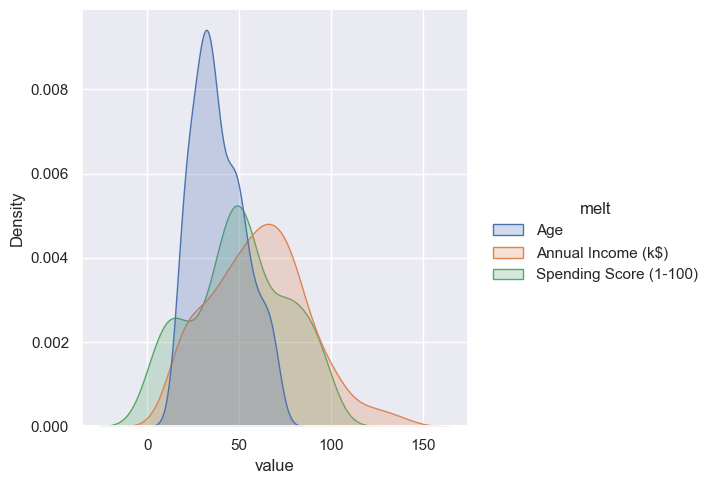

In [7]:
sns.displot(data=df_long, hue = 'melt', x='value', kind = "kde", fill = True);
#Displays the density across age, income, and spending score. 

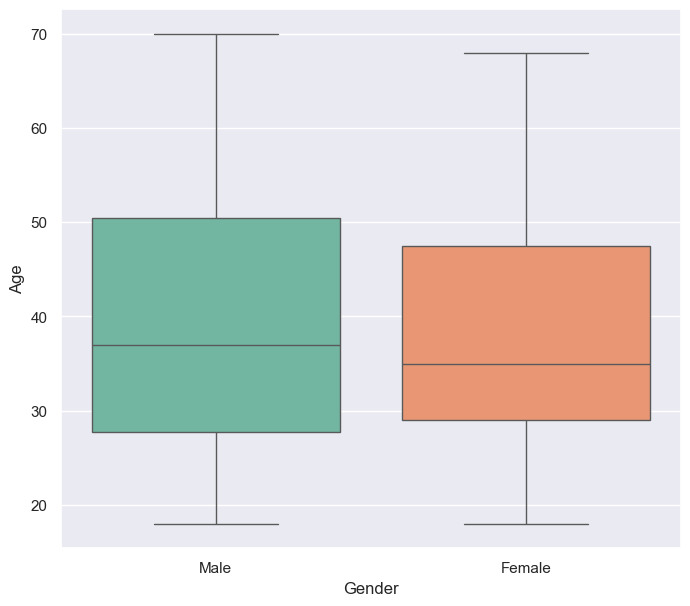

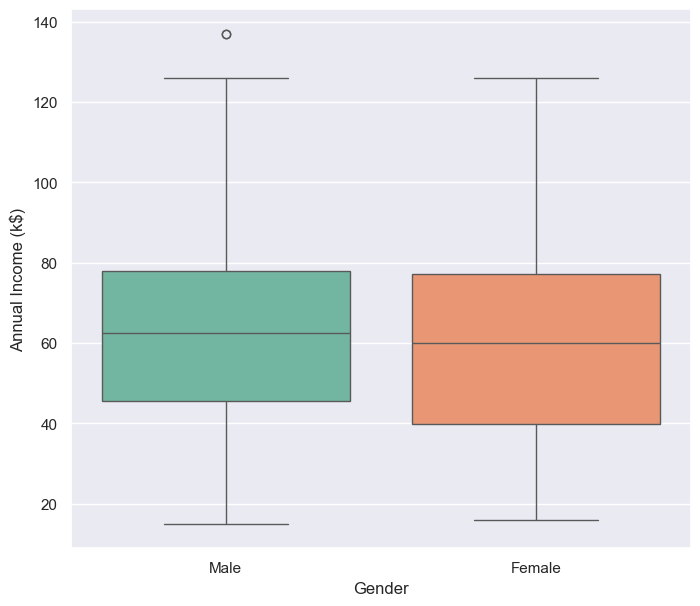

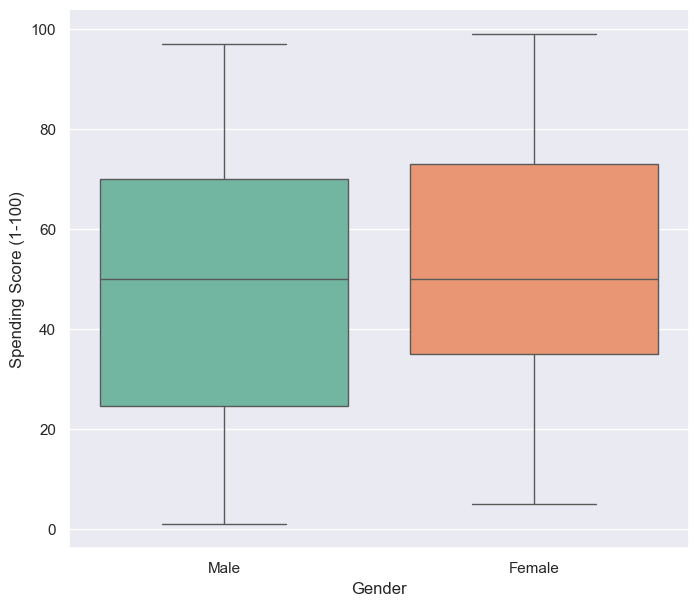

In [8]:
for x in df_col:
    plt.figure()
    sns.boxplot(data = df, x='Gender', y=df[x], palette = 'Set2')

In [9]:
df["Gender"].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

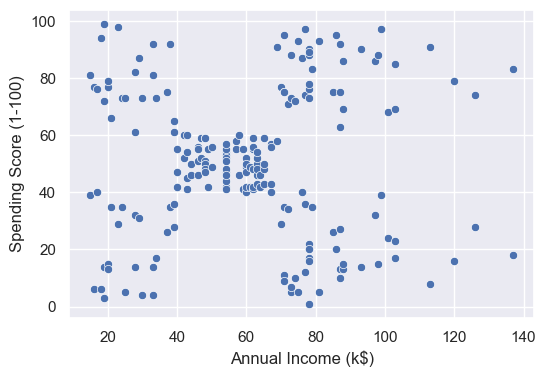

In [10]:
#In our Bivariate Analysis, we can see some clusters between Spending Score, and Annual Income 
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x = 'Annual Income (k$)', y= 'Spending Score (1-100)');

<Figure size 200x400 with 0 Axes>

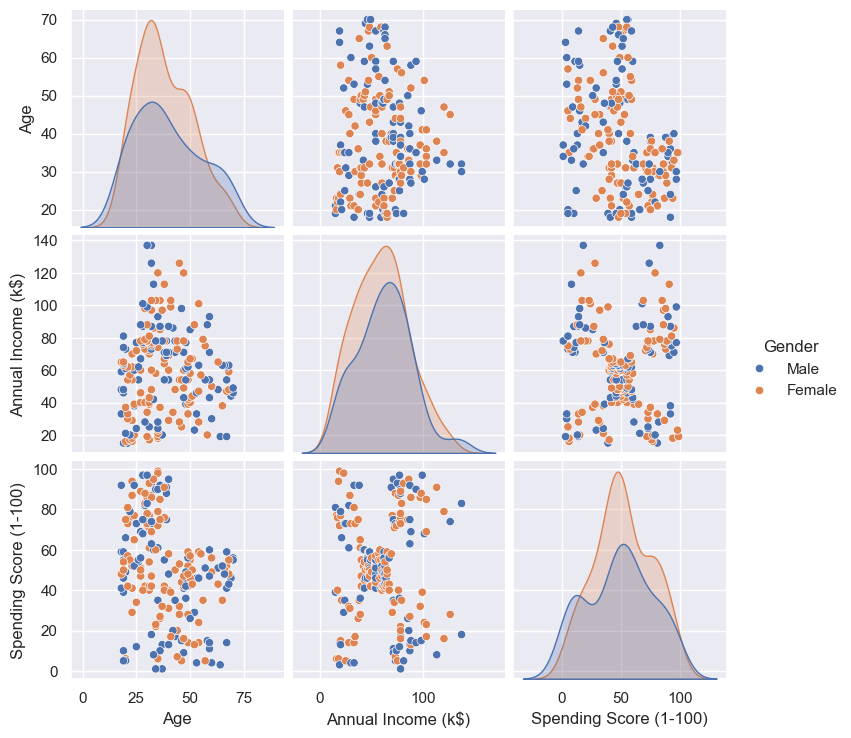

In [11]:
df = df.drop('CustomerID', axis = 1)
plt.figure(figsize=(2, 4))
sns.pairplot(df, hue ='Gender');

In [12]:
df.groupby(['Gender'])[df_col].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df_col_corr = df[df_col].corr()

<Axes: >

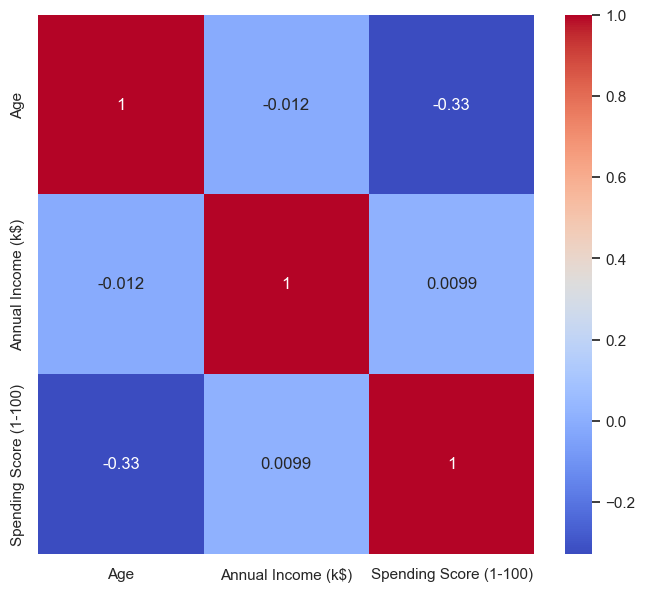

In [18]:
sns.heatmap(df_col_corr,annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [120]:
clustering1 = KMeans(n_clusters = 3)

In [121]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [122]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [123]:
df['Income Clusters'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster
0,Male,19,15,39,0,6
1,Male,21,15,81,0,5
2,Female,20,16,6,0,6
3,Female,23,16,77,0,5
4,Female,31,17,40,0,6


In [124]:
df['Income Clusters'].value_counts()

Income Clusters
1    86
0    58
2    56
Name: count, dtype: int64

In [125]:
clustering1.inertia_

25640.457784396836

In [126]:
#see the best inerta per load
inertia_df = {}

for x in range(1,12):
    clustering1 = KMeans(n_clusters = x)
    clustering1.fit(df[['Annual Income (k$)']])
    inertia_df["node "+str(x)] = clustering1.inertia_ 

In [127]:
inertia_df = pd.DataFrame(inertia_df.items(), columns=['Node', 'Value'])


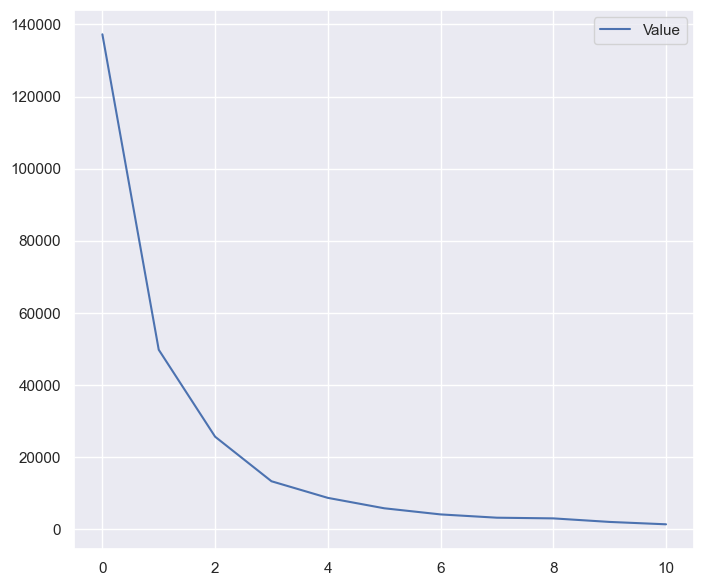

In [128]:
#We do the elbow method to see which clusters is ideal, in this case we see 2-3 is around the ideal cluster amount 
inertia_df.plot();

In [129]:
df.groupby('Income Clusters')[df_col].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Clusters,,,
0,37.120690,29.551724,49.689655
1,41.279070,60.906977,50.337209
2,36.910714,92.142857,50.517857


In [130]:
#Bivariate Clustering

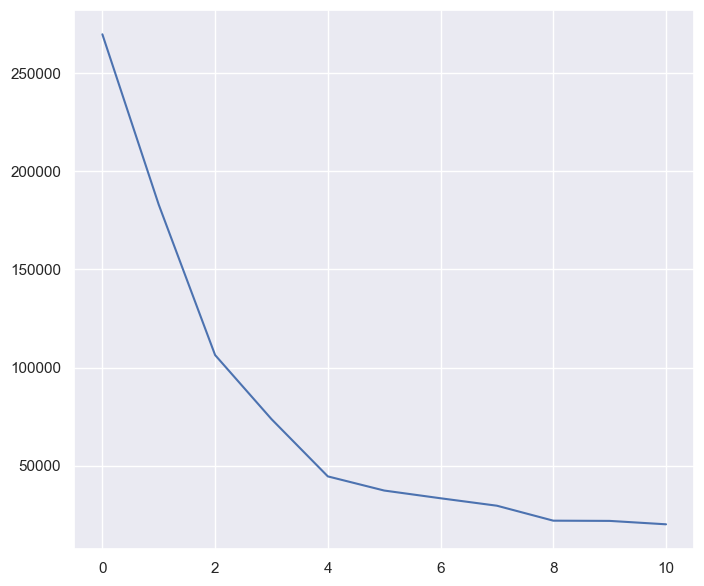

In [158]:
#see the best inerta per load
inertia_df2 = []

for x in range(1,12):
    clustering2 = KMeans(n_clusters = x)
    clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_df2.append(clustering2.inertia_) 
plt.plot(inertia_df2);
#Elbow is 4-5

In [162]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,3
2,Female,20,16,6,0,0
3,Female,23,16,77,0,3
4,Female,31,17,40,0,0


In [165]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

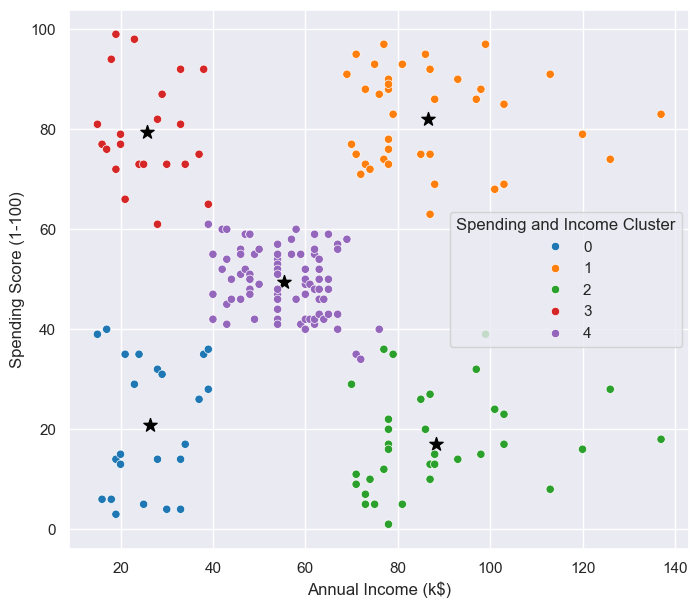

In [167]:
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker ='*')
sns.scatterplot(data=df, x= 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette ='tab10');

In [168]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize ='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.592593,0.407407


In [169]:
df.groupby('Spending and Income Cluster')[df_col].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519
